In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

In [23]:
file_path = "/Sales Data.csv"
df = pd.read_csv(file_path)

In [24]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [25]:
# DATA CLEANING
df.drop_duplicates(inplace=True)

# Handle missing values (Forward Fill)
df.ffill(inplace=True)


In [26]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [27]:

# Extract month & hour if missing
if 'Month' not in df.columns:
    df['Month'] = df['Order Date'].dt.month

if 'Hour' not in df.columns:
    df['Hour'] = df['Order Date'].dt.hour


In [28]:
# 2. EDA ANALYSIS
# -------------------------------

print("\n--- BASIC STATISTICS ---\n")
print(df.describe())

print("\n--- NULL VALUES ---\n")
print(df.isnull().sum())

print("\n--- DATA TYPES ---\n")
print(df.dtypes)


--- BASIC STATISTICS ---

         Unnamed: 0       Order ID  Quantity Ordered    Price Each  \
count  17273.000000   17273.000000      17273.000000  17273.000000   
mean    8680.443351  303946.779888          1.127482    183.881831   
min        0.000000  295665.000000          1.000000      2.990000   
25%     4341.000000  299792.000000          1.000000     11.950000   
50%     8683.000000  303944.000000          1.000000     14.950000   
75%    13024.000000  308095.000000          1.000000    150.000000   
max    17358.000000  312256.000000          7.000000   1700.000000   
std     5012.650999    4790.686894          0.450367    333.293903   

                          Order Date         Month         Sales          Hour  
count                          17273  17273.000000  17273.000000  17273.000000  
mean   2019-12-16 16:57:59.211486208     11.984079    184.876353     14.377757  
min              2019-12-01 02:50:00      1.000000      2.990000      0.000000  
25%              2

In [29]:

# -------------------------------
# 3. FEATURE ENCODING
# -------------------------------
df_encoded = df.copy()

# One-hot encode City & Product
df_encoded = pd.get_dummies(df_encoded, columns=['City', 'Product'], drop_first=True)


In [30]:
# -------------------------------
# 4. FEATURE SCALING
# -------------------------------
scaler = StandardScaler()

scale_cols = ['Quantity Ordered', 'Price Each', 'Sales', 'Hour']
df_encoded[scale_cols] = scaler.fit_transform(df_encoded[scale_cols])

In [31]:
# feature selection on all numeric columns including encoded ones
X = df_encoded.drop(['Sales'], axis=1)
X = X.select_dtypes(include=['int64', 'float64'])


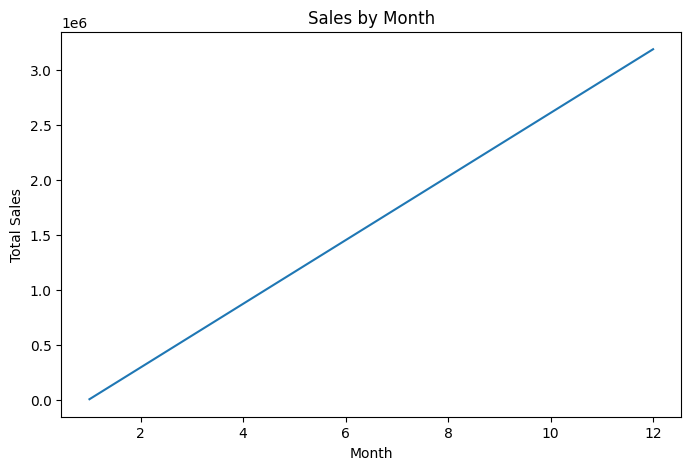

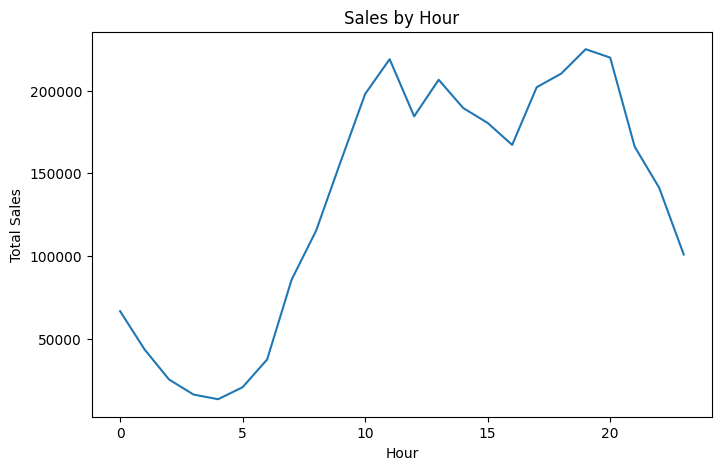

In [32]:
# 6. DATA VISUALIZATION - MATPLOTLIB
# -------------------------------

# SALES BY MONTH
plt.figure(figsize=(8,5))
plt.plot(df.groupby('Month')['Sales'].sum())
plt.title("Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# SALES BY HOUR
plt.figure(figsize=(8,5))
plt.plot(df.groupby('Hour')['Sales'].sum())
plt.title("Sales by Hour")
plt.xlabel("Hour")
plt.ylabel("Total Sales")
plt.show()

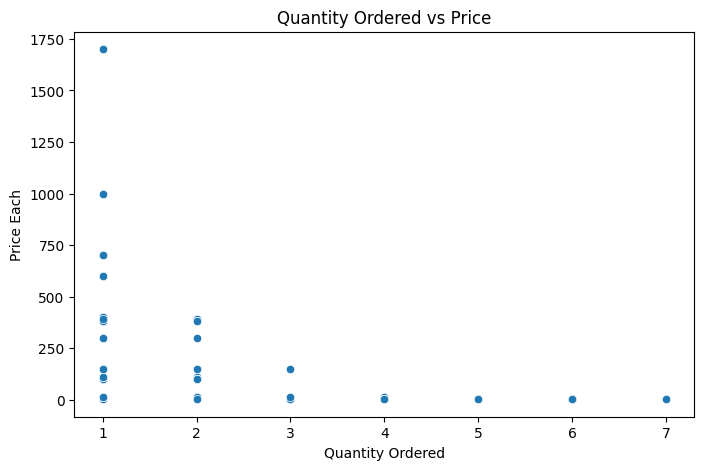

In [33]:
# Quantity vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Quantity Ordered', y='Price Each')
plt.title("Quantity Ordered vs Price")
plt.show()

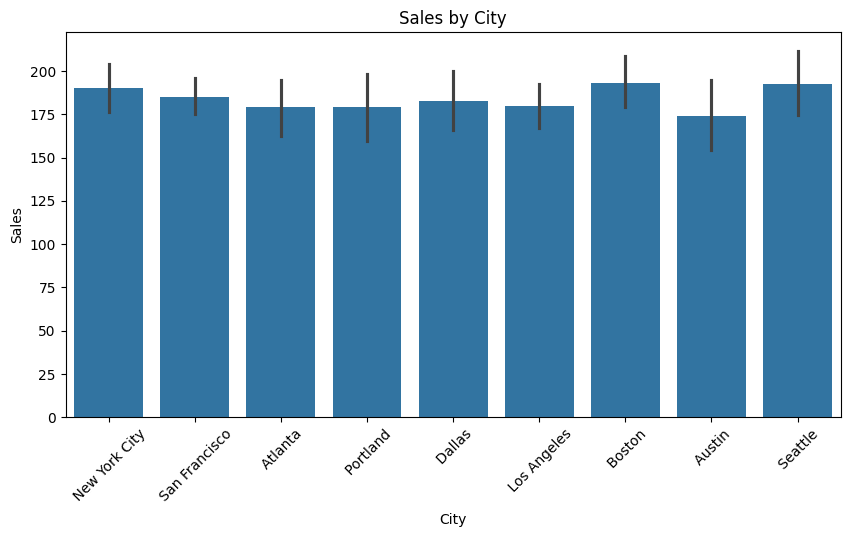

In [34]:
# Sales per city
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='City', y='Sales')
plt.title("Sales by City")
plt.xticks(rotation=45)
plt.show()

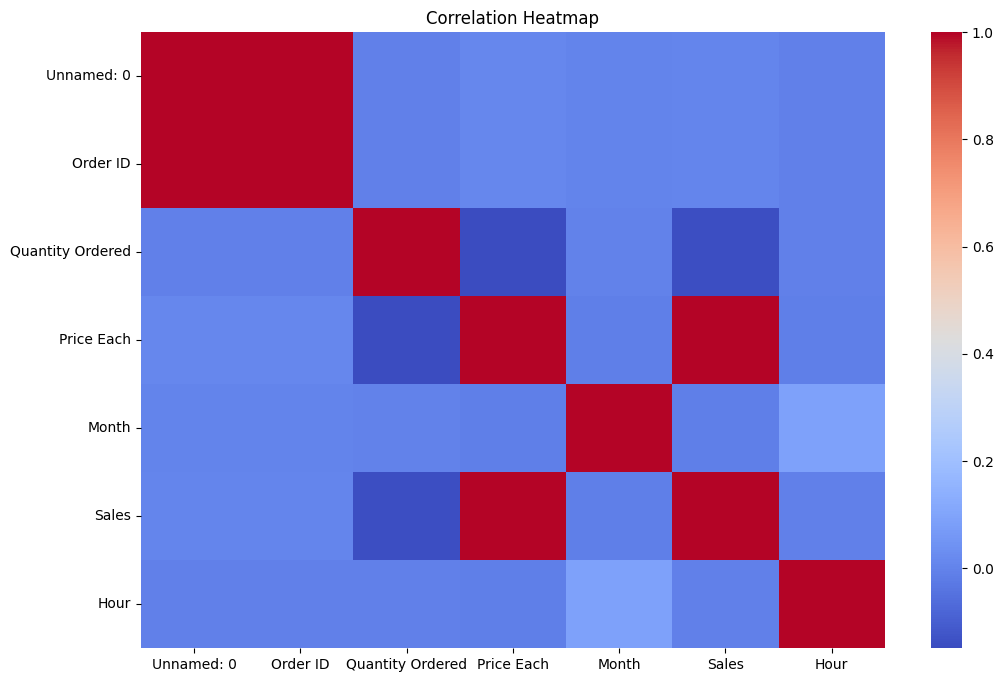

In [35]:
# FIXED CORRELATION HEATMAP
plt.figure(figsize=(12,8))

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

sns.heatmap(numeric_df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
